In [9]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('..')

In [10]:
BASE_DIR = r'/home/jgammell/Desktop/mi_leakage_localization/outputs/synth_unprotected_lambda_sweep'
RESULT_DIRS = [x for x in os.listdir(BASE_DIR) if os.path.exists(os.path.join(BASE_DIR, x, 'results.pickle'))]
lmbdas = [float(result_dir.split('=')[-1]) for result_dir in RESULT_DIRS]
indices = np.argsort(lmbdas)
RESULT_DIRS = [RESULT_DIRS[idx] for idx in indices]

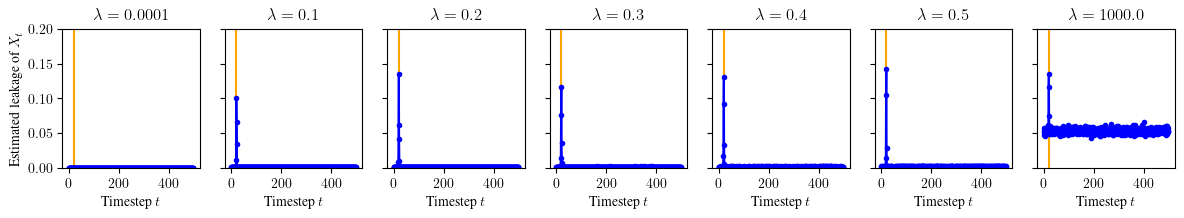

In [12]:
fig, axes = plt.subplots(1, len(RESULT_DIRS), figsize=(12, 16/len(RESULT_DIRS)), sharex=True, sharey=True)
for result_dir, ax in zip(RESULT_DIRS, axes):
    lbda = float(result_dir.split('=')[-1])
    with open(os.path.join(BASE_DIR, result_dir, 'results.pickle'), 'rb') as f:
        results = pickle.load(f)
    erasure_probs = results['erasure_probs']
    ax.axvline(results['train_dataset'].leaking_subbytes_cycles[0], color='orange')
    ax.plot(lbda * erasure_probs.squeeze(), color='blue', marker='.')
    ax.set_title(f'$\lambda={lbda}$')
    ax.set_xlabel('Timestep $t$')
axes[0].set_ylabel('Estimated leakage of $X_t$')
axes[0].set_ylim(0, 0.2)
fig.tight_layout()
fig.savefig(os.path.join(BASE_DIR, 'sweep.pdf'))